# Etapa 01)  Carregando os dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def carregar_arquivo(nome_arquivo):
    return pd.read_csv(nome_arquivo)

In [4]:
listings = carregar_arquivo('listings_cleaned.csv')

In [5]:
reviews = carregar_arquivo('reviews.csv')

# Etapa 02)  Limpeza e Tratamento de Dados

In [6]:
reviews.head()

,id,number_of_reviews,review_scores_rating
0,272335,367,4.92
1,272631,32,5.00
2,273363,5,5.00
3,273463,654,4.83
4,273496,60,4.80


In [7]:
listings.head()

,id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price
0,271975,Vidigal,Entire home/apt,4,1.0,2.0,2.0,236.0
1,272335,Copacabana,Entire home/apt,4,1.0,1.0,1.0,723.0
2,272631,Copacabana,Private room,2,1.0,1.0,2.0,1146.0
3,273261,Leblon,Entire home/apt,6,3.5,3.0,3.0,6742.0
4,273363,Santa Teresa,Private room,1,1.0,1.0,1.0,61.0


In [10]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32695 entries, 0 to 32694
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    32695 non-null  int64  
 1   number_of_reviews     32695 non-null  int64  
 2   review_scores_rating  32695 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 766.4 KB


In [11]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39499 entries, 0 to 39498
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      39499 non-null  int64  
 1   neighbourhood_cleansed  39499 non-null  object 
 2   room_type               39499 non-null  object 
 3   accommodates            39499 non-null  int64  
 4   bathrooms               36609 non-null  float64
 5   bedrooms                38976 non-null  float64
 6   beds                    36630 non-null  float64
 7   price                   36644 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 2.4+ MB


In [13]:
combinado = pd.merge(listings, reviews, on='id', how='inner')
combinado.head()

,id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating
0,272335,Copacabana,Entire home/apt,4,1.0,1.0,1.0,723.0,367,4.920000
1,272631,Copacabana,Private room,2,1.0,1.0,2.0,1146.0,32,5.000000
2,273261,Leblon,Entire home/apt,6,3.5,3.0,3.0,6742.0,0,4.812309
3,273363,Santa Teresa,Private room,1,1.0,1.0,1.0,61.0,5,5.000000
4,273463,Lagoa,Entire home/apt,6,2.0,2.0,6.0,1411.0,654,4.830000


In [14]:
combinado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32695 entries, 0 to 32694
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      32695 non-null  int64  
 1   neighbourhood_cleansed  32695 non-null  object 
 2   room_type               32695 non-null  object 
 3   accommodates            32695 non-null  int64  
 4   bathrooms               32695 non-null  float64
 5   bedrooms                32695 non-null  float64
 6   beds                    32695 non-null  float64
 7   price                   32695 non-null  float64
 8   number_of_reviews       32695 non-null  int64  
 9   review_scores_rating    32695 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 2.5+ MB


In [15]:
combinado.isnull().sum()

,0
id,0
neighbourhood_cleansed,0
room_type,0
accommodates,0
bathrooms,0
bedrooms,0
beds,0
price,0
number_of_reviews,0
review_scores_rating,0


# Etapa 03) Tratando e Visualizando Outliers

In [23]:
combinado['price'].describe()

,price
count,32695.000000
mean,782.973788
std,522.337706
min,33.000000
25%,386.000000
50%,671.000000
75%,1036.000000
max,10000.000000


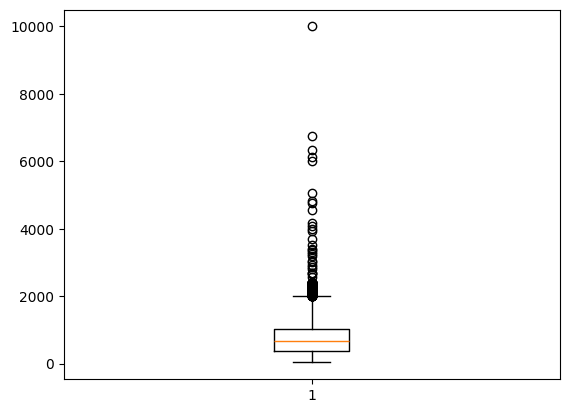

In [22]:
plt.boxplot(x=combinado['price'])
plt.show()

In [33]:
def distancia_interquartil(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr
    return print(f'Q1: {q1}, Q3: {q3}, IQR: {iqr}, \nLimite inferior: {limite_inferior}, Limiter Superior: {limite_superior}')

In [34]:
distancia_interquartil(combinado['price'])

Q1: 386.0, Q3: 1036.0, IQR: 650.0, 
Limite inferior: -589.0, Limiter Superior: 2011.0


In [35]:
outliers_price = combinado[(combinado['price'] < -589) | (combinado['price'] > 2011)]
outliers_price.shape

(923, 10)

In [39]:
combinado_sem_outliers = combinado[(combinado['price'] > -589) & (combinado['price'] < 2011)]
combinado_sem_outliers.shape

(31769, 10)

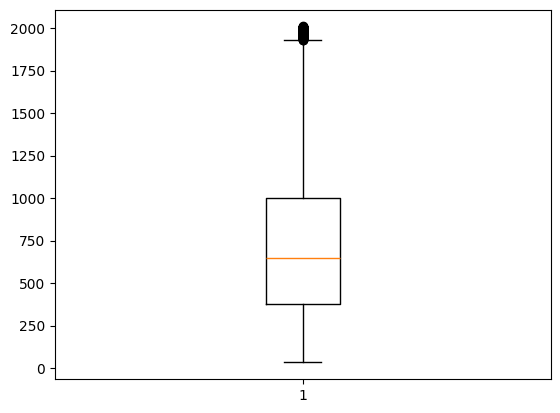

In [64]:
plt.boxplot(x=combinado_sem_outliers['price'])
plt.show()

# Etapa 04) Transformando Dados Categóricos

In [43]:
combinado_sem_outliers['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [46]:
combinado_sem_outliers['room_type_cat'] = combinado_sem_outliers['room_type'].astype('category').cat.codes
combinado_sem_outliers.head()

/tmp/ipython-input-46-1142013860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combinado_sem_outliers['room_type_cat'] = combinado_sem_outliers['room_type'].astype('category').cat.codes


,id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,room_type_cat
0,272335,Copacabana,Entire home/apt,4,1.0,1.0,1.0,723.0,367,4.92,0
1,272631,Copacabana,Private room,2,1.0,1.0,2.0,1146.0,32,5.00,2
3,273363,Santa Teresa,Private room,1,1.0,1.0,1.0,61.0,5,5.00,2
4,273463,Lagoa,Entire home/apt,6,2.0,2.0,6.0,1411.0,654,4.83,0
5,273496,Leblon,Entire home/apt,6,2.5,2.0,5.0,703.0,60,4.80,0


In [47]:
combinado_sem_outliers['room_type_cat'].unique()

array([0, 2, 3, 1], dtype=int8)

In [55]:
combinado_sem_outliers[combinado_sem_outliers['room_type'] == 'Hotel room'].head()

,id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,room_type_cat
715,2336651,Leblon,Hotel room,2,1.0,1.0,1.0,1853.0,12,5.00,1
1491,4557003,Santa Teresa,Hotel room,2,1.0,0.0,1.0,870.0,192,4.83,1
2476,10626211,Leblon,Hotel room,6,2.0,2.0,2.0,1737.0,191,4.64,1
2696,11607165,Ipanema,Hotel room,1,1.0,2.0,1.0,59.0,33,4.48,1
2853,12306706,Botafogo,Hotel room,2,2.5,1.0,1.0,1068.0,175,4.74,1


In [59]:
combinado_sem_outliers[combinado_sem_outliers['room_type'] == 'Shared room'].head()

,id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,room_type_cat
625,2233590,Tijuca,Shared room,1,2.0,1.0,5.0,255.0,5,5.000000,3
632,2233651,Tijuca,Shared room,1,2.0,1.0,5.0,136.0,7,4.860000,3
633,2233690,Tijuca,Shared room,1,1.5,1.0,5.0,255.0,6,5.000000,3
724,2342928,Centro,Shared room,1,1.0,1.0,1.0,300.0,11,4.820000,3
770,2377289,Copacabana,Shared room,2,1.0,1.0,1.0,1214.0,0,4.812309,3


In [60]:
'''
Entire home/apt = 0
Private room = 2
Shared room = 3
Hotel Room = 1
'''

'\nEntire home/apt = 0\nPrivate room = 2\nShared room = 3\nHotel Room = 1\n'

# Etapa 05)  Conferindo Resultado Final

In [61]:
df_final = combinado_sem_outliers.drop(['room_type'], axis=1)
df_final.head()

,id,neighbourhood_cleansed,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,room_type_cat
0,272335,Copacabana,4,1.0,1.0,1.0,723.0,367,4.92,0
1,272631,Copacabana,2,1.0,1.0,2.0,1146.0,32,5.00,2
3,273363,Santa Teresa,1,1.0,1.0,1.0,61.0,5,5.00,2
4,273463,Lagoa,6,2.0,2.0,6.0,1411.0,654,4.83,0
5,273496,Leblon,6,2.5,2.0,5.0,703.0,60,4.80,0


In [62]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31769 entries, 0 to 32694
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      31769 non-null  int64  
 1   neighbourhood_cleansed  31769 non-null  object 
 2   accommodates            31769 non-null  int64  
 3   bathrooms               31769 non-null  float64
 4   bedrooms                31769 non-null  float64
 5   beds                    31769 non-null  float64
 6   price                   31769 non-null  float64
 7   number_of_reviews       31769 non-null  int64  
 8   review_scores_rating    31769 non-null  float64
 9   room_type_cat           31769 non-null  int8   
dtypes: float64(5), int64(3), int8(1), object(1)
memory usage: 3.5+ MB


In [63]:
df_final.describe()

,id,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,room_type_cat
count,3.176900e+04,31769.000000,31769.000000,31769.000000,31769.000000,31769.000000,31769.000000,31769.000000,31769.00000
mean,6.953711e+17,3.693066,1.367040,1.387831,2.153168,739.838333,24.113916,4.815984,0.42510
std,5.185993e+17,1.899234,0.711896,0.841480,1.626813,457.215566,46.397268,0.297784,0.83093
min,1.787800e+04,1.000000,0.000000,0.000000,0.000000,33.000000,0.000000,0.000000,0.00000
25%,4.345733e+07,2.000000,1.000000,1.000000,1.000000,379.000000,1.000000,4.812309,0.00000
50%,8.625348e+17,4.000000,1.000000,1.000000,2.000000,650.000000,6.000000,4.830000,0.00000
75%,1.148606e+18,4.000000,2.000000,2.000000,3.000000,1000.000000,26.000000,5.000000,0.00000
max,1.320520e+18,16.000000,20.000000,26.000000,50.000000,2010.000000,710.000000,5.000000,3.00000


In [65]:
df_final.columns

Index(['id', 'neighbourhood_cleansed', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'number_of_reviews', 'review_scores_rating',
       'room_type_cat'],
      dtype='object')